### **1. Importanto as bibliotecas necessárias**

In [2]:
import tensorflow as tf
import pandas as pd

from sklearn.model_selection import train_test_split
from utils.utils import split_data

from crack_segmentation.subroutines.loss_metrics import (
    Weighted_Cross_Entropy,
    F1_score,
    Precision_dil,
    F1_score_dil
)

2024-02-29 22:29:33.691203: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 22:29:33.691237: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 22:29:33.691262: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 22:29:33.698666: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-29 22:29:34.497703: W tensorflow/compiler/

### **2. Carreganto os dados**

In [3]:
dataset = pd.read_csv('../dataset/dataset_final.csv')

dataset['Filepath'] = dataset['Filepath'].apply(lambda x: "../" + x)

train_df, test_df = train_test_split(
    dataset.sample(6000, random_state=42),
    train_size=0.80,
    random_state=42
)

_,_, test_data = split_data(train_df, test_df, image_width=224, image_height=224, class_mode='categorical')

Found 3840 validated image filenames belonging to 2 classes.
Found 960 validated image filenames belonging to 2 classes.
Found 1200 validated image filenames belonging to 2 classes.


### **3. Modelo de segmentação e classificação**

#### **3.1. Importando o modelo de classificação**

In [4]:
model = tf.keras.models.load_model(
    'crack_segmentation/output/checkpoints/final_model_2.h5',
    custom_objects={
        'loss': Weighted_Cross_Entropy(10),
        'F1_score': F1_score,
        'F1_score_dil': F1_score_dil,
        'Precision_dil': Precision_dil
    }
)

model.summary()

2024-02-29 22:29:35.634461: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-02-29 22:29:35.634503: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: cilab-local
2024-02-29 22:29:35.634511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: cilab-local
2024-02-29 22:29:35.634755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.161.7
2024-02-29 22:29:35.634783: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.154.5
2024-02-29 22:29:35.634791: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:312] kernel version 535.154.5 does not match DSO version 535.161.7 -- cannot find working devices in this configuration


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 32)         864       ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)         128       ['conv1[0][0]']               
 on)                                                                                          

#### **3.2. Fazendo predições**

In [5]:
loss, acc = model.evaluate(test_data)

print(f'Perda: {loss}')
print(f'Acurácia: {acc}')

38/38 [==============================] - 112s 3s/step - loss: 2.9162 - accuracy: 0.9742
Perda: 2.9161758422851562
Acurácia: 0.9741666913032532


In [15]:
y_pred = model.predict(test_data)

38/38 [==============================] - 112s 3s/step


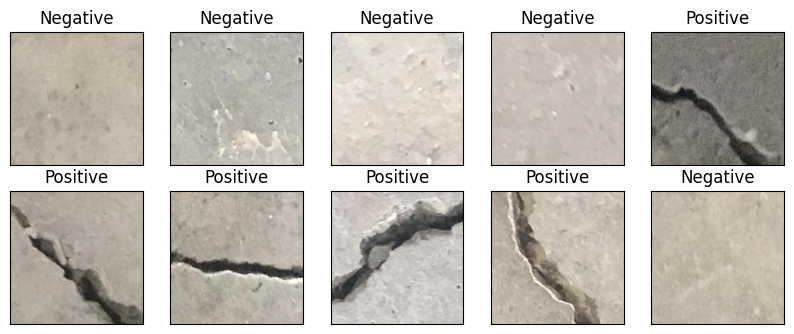

In [45]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['Negative', 'Positive']
fig = plt.figure(figsize=(10,10))

for i in range(10):
    ax = fig.add_subplot(5,5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_data[0][0][i])
    x = class_names[np.argmax(y_pred[i])]
    ax.set_title("{}".format(x))